#### [ Fish 길이에 따른 무계 예측 - 다항회귀 PolynominlRegression] 
- 데이터셋 : fish.csv
- 피쳐 : 길이 Length
- 타겟 : 무게 Weight
- 학습방법 : 지도학습 - 회귀(Regression)
- 알고리즘 : LinearRegression

[1] 모듈로딩 및 데이터 준비<hr>

In [4]:
## [1-1] 모듈로딩
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [5]:
## [1-2] 데이터 준비
DATA_FILE = '../../Data/fish.csv'

In [6]:
## 데이터 로딩
## - 농어 생선의 무게와 길이 
fishDF = pd.read_csv(DATA_FILE, header=None, 
                     skiprows=73, skipfooter=31, 
                     usecols=[1,2], engine='python')
fishDF.head()

,1,2
0,300.0,26.0
1,5.9,8.4
2,32.0,13.7
3,40.0,15.0
4,51.5,16.2


##

[2] 데이터 시각화 <hr>

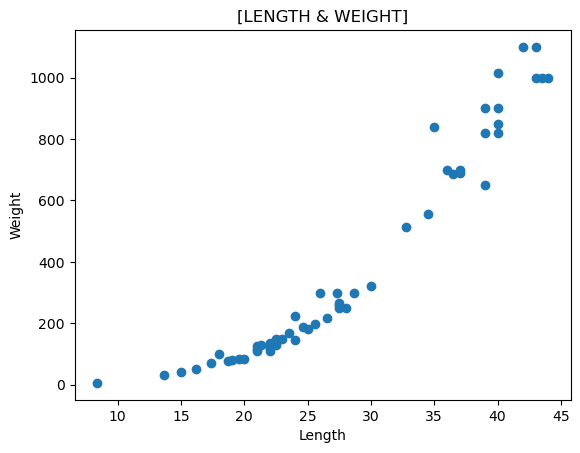

In [7]:
## 시각화 
## 1번 컬럼 =>  Weight,  2번 컬럼 => Length
plt.plot(fishDF[2], fishDF[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.show()

[3] 데이터 셋 준비<hr>
- 피쳐와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 ==> 학습용과 테스트용으로만 분리

In [33]:
## [3-1] 피쳐와 타겟 분리 ==> 피쳐는 2D, 타겟 1D
featureDF = fishDF[fishDF.columns[-1:]]
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF => {featureDF.ndim}D  {featureDF.shape}')
print(f'targetSR => {targetSR.ndim}D   {targetSR.shape}')

featureDF => 2D  (57, 1)
targetSR => 1D   (57,)


In [9]:
## [3-2] 데이터셋 분리 => 학습용 : 테스트용 = 75 : 25
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR, 
                                                    random_state=42)

print(f'X_train => {X_train.ndim}D  {X_train.shape} y_train => {y_train.ndim}D  {y_train.shape}')
print(f'X_test => {X_test.ndim}D   {X_test.shape} y_test => {y_test.ndim}D   {y_test.shape}')

X_train => 2D  (42, 1) y_train => 1D  (42,)
X_test => 2D   (15, 1) y_test => 1D   (15,)


[4] 학습 진행 <hr>

In [10]:
## [4-1] 알고리즘 객체 생성
model = LinearRegression()

## [4-2] 학습 => 학습용데이터셋 사용 : 규칙/패턴 X 즉, 모델 없음 
model.fit(X_train, y_train)

LinearRegression()

In [11]:
## => fit 후 학습데이터 확인
print( model.coef_)
print( model.intercept_)

[36.88433736]
-644.6784513423198


[5] 학습 평가 <hr>
- 모델 적합도 평가 : score()
- 비용 계산 평가 : rmse(), mse(), mae()

In [12]:
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]

for data, label in [[X_train, y_train], [X_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = model.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = model.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [13]:
## 성능평가 결과 
resultDF = pd.DataFrame(result, 
                        columns=['score','rmse','mse','mae'],
                        index=['Train','Test'])

In [14]:
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['diff']= (resultDF.loc['Train']  - resultDF.loc['Test']).abs()
resultDF

,score,rmse,mse,mae
Train,0.910987,104.079052,10832.449036,78.538285
Test,0.945052,74.676687,5576.607618,61.452904
diff,0.034066,29.402365,5255.841418,17.085381


- [학습 결과 분석]
    * 모델 적합도 : Train > Test : 과대적합 
    * 비용 계산값 : Train < Test : 과대적합

- [해결방안]
    * 과도한  반복 학습 => scikit-learn에서는 개발자 제어 불가 X
    * 모델 복잡한가?  => 피쳐가 많은가? 피쳐는 1개 밖에 없음
    * 데이터가 충분한가? => 데이터 충분하지 않음!
    * 해당 알고리즘의 결과물 분석 => 선형식과 데이터의 관계 => 완벽한 선형이 아님.. 오히려 곡선! 


In [15]:
## y = WX+b
y = X_train*model.coef_[0]+model.intercept_

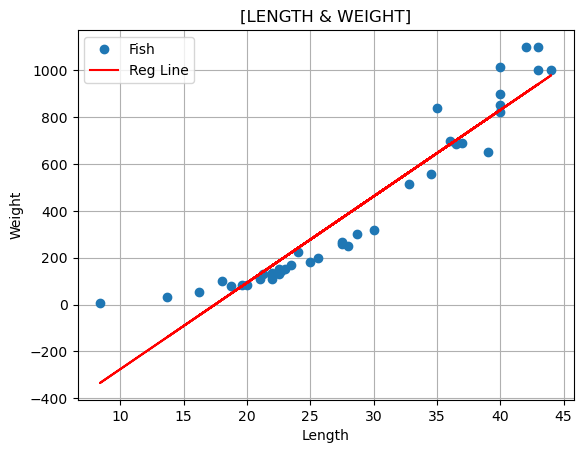

In [16]:
## 시각화 및 회귀선 ---------------------------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(X_train, y, 'r-', label='Reg Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

### [ 모델 성능평가에서의 문제점 개선을 위해서 추가 작업 ]
- 손실/비용함수 값이 큼 ==> 직선을 곡선의 형태 수식 
- 기존 존재하는 피쳐를 활용해서 피쳐 생성 ==>  다항회귀 

[6] 특성공학 => 피쳐 생성 후 추가 <hr>
- 관련 모듈 로딩 
- 학습 진행 전에 전처리 단계에서 피쳐 추가 

In [17]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [18]:
## [6-2] PolynomialFeatures 클래스 사용법
## - 임시데이터
X = [[2]]

## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(degree=2)

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 3


array([[1., 2., 4.]])

In [19]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(interaction_only=True)  # 피쳐끼리 곱셈값만 적용

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 2


array([[1., 2.]])

In [20]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias=False)  # 절편값 1 제외

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 2


array([[2., 4.]])

In [21]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias=False)  # 절편값 1 제외

## - 객체/인스턴스에 피쳐 생성할 정보 제공 + 피쳐 생성 후 추가 
X2=poly.fit_transform(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)
print(X2)

n_features_in_     : 1
n_output_features_ : 2
[[2. 4.]]


In [22]:
## [6-3] 데이터셋 즉, 학습용/테스트용 데이터셋 피쳐 추가 
## - 학 습 용 : X_train
## - 테스트용 : X_test 
## -> 학습용 데이터셋으로 피쳐 추가 정보 제공
poly = PolynomialFeatures() 

## -> 학습용 피쳐 제공
poly.fit(X_train)

## -> 학습용/테스트용 피쳐 추가 
poly_train = poly.transform(X_train)
poly_test  = poly.transform(X_test)

In [23]:
print(f'[학 습 용 피쳐 ] => {type(poly_train)}, {poly_train.shape}')
print(f'[테스트용 피쳐 ] => {type(poly_test)}, {poly_test.shape}')

[학 습 용 피쳐 ] => <class 'numpy.ndarray'>, (42, 3)
[테스트용 피쳐 ] => <class 'numpy.ndarray'>, (15, 3)


[7] 재학습 <hr>

In [24]:
## - 선형회귀인스턴스 생성
polyModel = LinearRegression()

## - 학습
polyModel.fit(poly_train, y_train)


LinearRegression()

In [25]:
# - 모델 파라미터
print(f'coef_      : {polyModel.coef_}')
print(f'intercept_ : {polyModel.intercept_}')

coef_      : [  0.         -22.27783008   1.02155609]
intercept_ : 127.9019147153349


[8] 재학습 평가 <hr>

In [26]:
## [8-1] 시각화 - 곡선 회귀선 
import numpy as np

print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]

## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)


min : 8.4 max : 44.0
shape : (50,)
[ 8.4         9.12653061  9.85306122 10.57959184 11.30612245 12.03265306
 12.75918367 13.48571429 14.2122449  14.93877551 15.66530612 16.39183673
 17.11836735 17.84489796 18.57142857 19.29795918 20.0244898  20.75102041
 21.47755102 22.20408163 22.93061224 23.65714286 24.38367347 25.11020408
 25.83673469 26.56326531 27.28979592 28.01632653 28.74285714 29.46938776
 30.19591837 30.92244898 31.64897959 32.3755102  33.10204082 33.82857143
 34.55510204 35.28163265 36.00816327 36.73469388 37.46122449 38.1877551
 38.91428571 39.64081633 40.36734694 41.09387755 41.82040816 42.54693878
 43.27346939 44.        ]


In [27]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )

min : 8.4 max : 44.0


In [28]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*polyModel.coef_[0]) + (x * polyModel.coef_[1]) + ((x**2)*polyModel.coef_[2]) + polyModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[  12.84913993    9.67166123    7.57263263    6.55205411    6.60992567
    7.74624732    9.96101906   13.25424089   17.6259128    23.0760348
   29.60460689   37.21162906   45.89710132   55.66102367   66.5033961
   78.42421862   91.42349123  105.50121392  120.6573867   136.89200957
  154.20508252  172.59660556  192.06657869  212.6150019   234.2418752
  256.94719859  280.73097206  305.59319562  331.53386927  358.552993
  386.65056682  415.82659073  446.08106472  477.4139888   509.82536297
  543.31518723  577.88346157  613.53018599  650.25536051  688.05898511
  726.9410598   766.90158457  807.94055943  850.05798438  893.25385941
  937.52818453  982.88095974 1029.31218503 1076.82186042 1125.40998588]


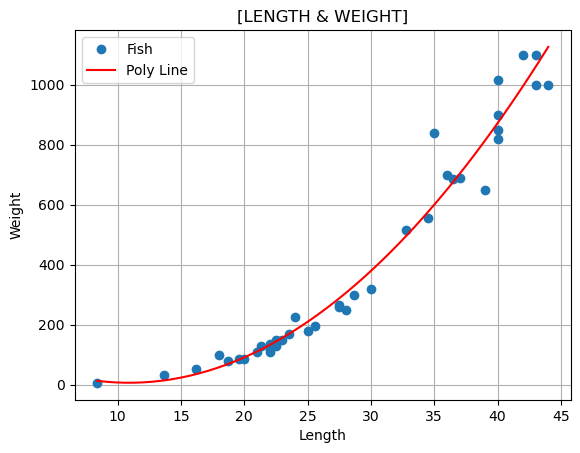

In [29]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

In [30]:
## [8-2] 성능평가 -----------------------------------------------------------
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]  

for data, label in [[poly_train, y_train], [poly_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = polyModel.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = polyModel.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [31]:

resultDF.loc['polyTrain'] = result[0]
resultDF.loc['polyTest']  = result[1]
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['polyDiff']= (resultDF.loc['polyTrain']  - resultDF.loc['polyTest']).abs()
resultDF

,score,rmse,mse,mae
Train,0.910987,104.079052,10832.449036,78.538285
Test,0.945052,74.676687,5576.607618,61.452904
diff,0.034066,29.402365,5255.841418,17.085381
polyTrain,0.968595,61.820539,3821.778999,37.656574
polyTest,0.983359,41.096065,1688.886558,30.115386
polyDiff,0.014764,20.724474,2132.892441,7.541188


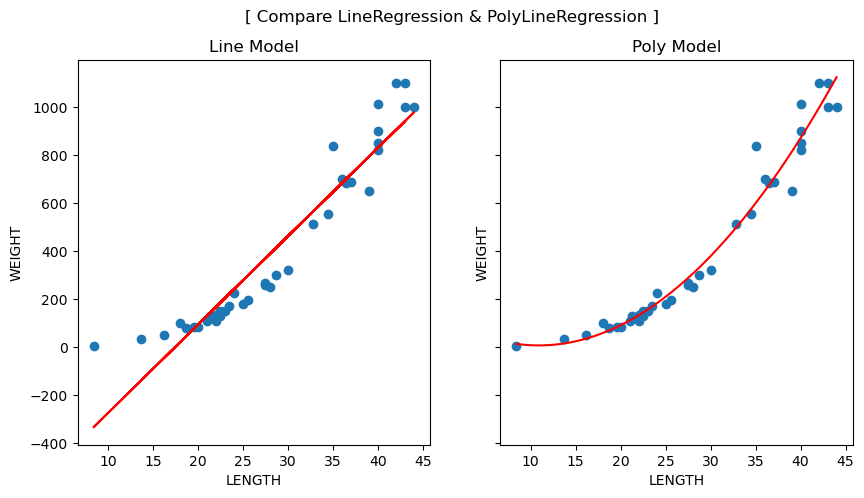

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten()                               
data_label = [[X_train, model.predict(X_train)], [x, y]]

for ax, title, data in zip(axes, ["Line Model", "Poly Model"],data_label):
    ax.plot(X_train, y_train, 'o', label='Fish')
    ax.plot(data[0], data[1], 'r-', label='Poly Line')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WEIGHT")
    ax.set_title(title)

plt.suptitle("[ Compare LineRegression & PolyLineRegression ]")
plt.show()